# Results

## Setup

### Constants

In [41]:
RESULTS_FILE_NAME = "results.csv"
DATASETS = ("ML-100K", "ML-1M")
METRIC = "RMSE"
X_LABEL = "Dimensions"

BASELINE_NAME = "GLocal-K Baseline"
MF_PREFIX = "MF"
HYBRID_PREFIX = "GLocal-K + MF"
# Get name without prefix
is_hybrid_func = lambda name: name.startswith(HYBRID_PREFIX)
get_name_func = lambda name: int(name[len(HYBRID_PREFIX):]) if is_hybrid_func(name) else int(name[len(MF_PREFIX):])

CAPTION_SUFFIX = " - Effect of Latent Dimensions"

### Imports

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# plot to latex
import tikzplotlib
from matplotlib.lines import Line2D
from matplotlib.legend import Legend
Line2D._us_dashSeq    = property(lambda self: self._dash_pattern[1])
Line2D._us_dashOffset = property(lambda self: self._dash_pattern[0])
Legend._ncol = property(lambda self: self._ncols)

### Load the results

In [43]:
results_df = pd.read_csv(RESULTS_FILE_NAME)
results_df_dict = {dataset_name: results_df[results_df["Dataset"] == dataset_name].drop(columns=["Dataset"]).reset_index(drop=True)
                    for dataset_name in DATASETS}

## Plots

### ML-100K

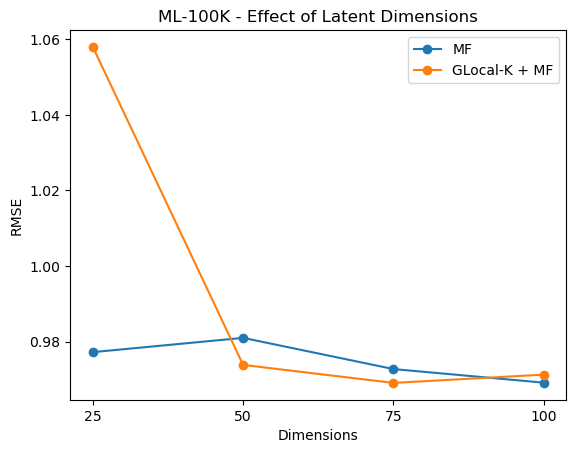

In [44]:
dataset_name = DATASETS[0]
dataset_df = results_df_dict[dataset_name]
dataset_df = dataset_df[dataset_df["Model"] != BASELINE_NAME]
X_MF = dataset_df[dataset_df["Model"].apply(lambda name: not is_hybrid_func(name))]["Model"].apply(get_name_func)
Y_MF = dataset_df[dataset_df["Model"].apply(lambda name: not is_hybrid_func(name))][METRIC]
X_HYBRID = dataset_df[dataset_df["Model"].apply(is_hybrid_func)]["Model"].apply(get_name_func)
Y_HYBRID = dataset_df[dataset_df["Model"].apply(is_hybrid_func)][METRIC]
plt.plot(X_MF, Y_MF, label=MF_PREFIX, marker='o')
plt.plot(X_HYBRID, Y_HYBRID, label=HYBRID_PREFIX, marker='o')
plt.title(dataset_name + CAPTION_SUFFIX)
plt.xlabel(X_LABEL)
plt.ylabel(METRIC)
plt.xticks(range(25, 101, 25))
min_y = min(min(Y_MF), min(Y_HYBRID))
max_y = max(max(Y_MF), max(Y_HYBRID))
plt.legend()
tikzplotlib.save(f"{dataset_name.lower()}_results.tex")

### ML-1M

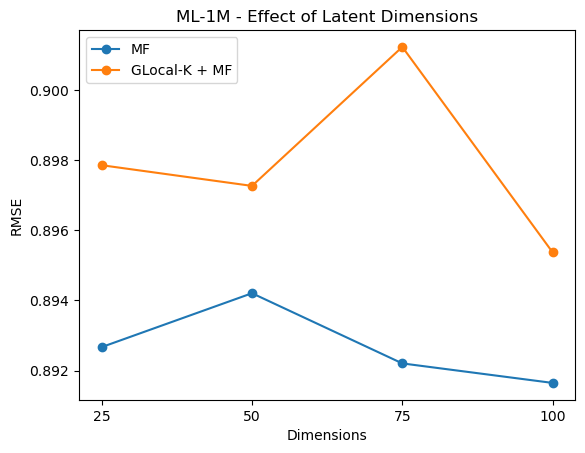

In [45]:
dataset_name = DATASETS[1]
dataset_df = results_df_dict[dataset_name]
dataset_df = dataset_df[dataset_df["Model"] != BASELINE_NAME]
X_MF = dataset_df[dataset_df["Model"].apply(lambda name: not is_hybrid_func(name))]["Model"].apply(get_name_func)
Y_MF = dataset_df[dataset_df["Model"].apply(lambda name: not is_hybrid_func(name))][METRIC]
X_HYBRID = dataset_df[dataset_df["Model"].apply(is_hybrid_func)]["Model"].apply(get_name_func)
Y_HYBRID = dataset_df[dataset_df["Model"].apply(is_hybrid_func)][METRIC]
plt.plot(X_MF, Y_MF, label=MF_PREFIX, marker='o')
plt.plot(X_HYBRID, Y_HYBRID, label=HYBRID_PREFIX, marker='o')
plt.title(dataset_name + CAPTION_SUFFIX)
plt.xlabel(X_LABEL)
plt.ylabel(METRIC)
plt.xticks(range(25, 101, 25))
min_y = min(min(Y_MF), min(Y_HYBRID))
max_y = max(max(Y_MF), max(Y_HYBRID))
plt.legend()
tikzplotlib.save(f"{dataset_name.lower()}_results.tex")